In [19]:
# Project: Human Activity Recognition Using LSTM Networks

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import zipfile
import os

In [4]:
import os
import zipfile

# Dataset URL
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
DATA_ZIP = "UCI_HAR_Dataset.zip"

# Download and extract the dataset
if not os.path.exists(DATA_ZIP):
    print("Downloading and extracting dataset...")
    !wget {DATA_URL} -O {DATA_ZIP}
    with zipfile.ZipFile(DATA_ZIP, 'r') as zip_ref:
        zip_ref.extractall('/content')
    print("Dataset downloaded and extracted.")
else:
    print("Dataset already exists.")


--2025-04-26 13:58:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI_HAR_Dataset.zip’

UCI_HAR_Dataset.zip     [            <=>     ]  58.17M  6.55MB/s    in 8.9s    

2025-04-26 13:58:38 (6.55 MB/s) - ‘UCI_HAR_Dataset.zip’ saved [60999314]

Dataset downloaded and extracted.


In [5]:
# Cell 3: Load Data
def load_data(file_path):
    return pd.read_csv(file_path, delim_whitespace=True, header=None)

# Load train and test data
X_train = load_data(DATA_PATH + 'train/X_train.txt').values
X_test = load_data(DATA_PATH + 'test/X_test.txt').values

y_train = load_data(DATA_PATH + 'train/y_train.txt').values.ravel()
y_test = load_data(DATA_PATH + 'test/y_test.txt').values.ravel()

print("Train and test data loaded successfully.")

<ipython-input-5-5085930ba0b7>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-5-5085930ba0b7>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None)


Train and test data loaded successfully.


<ipython-input-5-5085930ba0b7>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-5-5085930ba0b7>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Save the original shape of the data
original_shape_train = X_train.shape
original_shape_test = X_test.shape

# Reshape to 2D: (samples, time_steps * features)
X_train_reshaped = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to 3D: (samples, time_steps, features)
X_train = X_train_scaled.reshape(original_shape_train)
X_test = X_test_scaled.reshape(original_shape_test)
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
print("Data has been standardized successfully.")



Data has been standardized successfully.


In [25]:

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

print("Data preprocessing complete.")

Data preprocessing complete.


Reshaped X_train shape: (7352, 187, 3)
Sample data shape: (1, 187, 3)


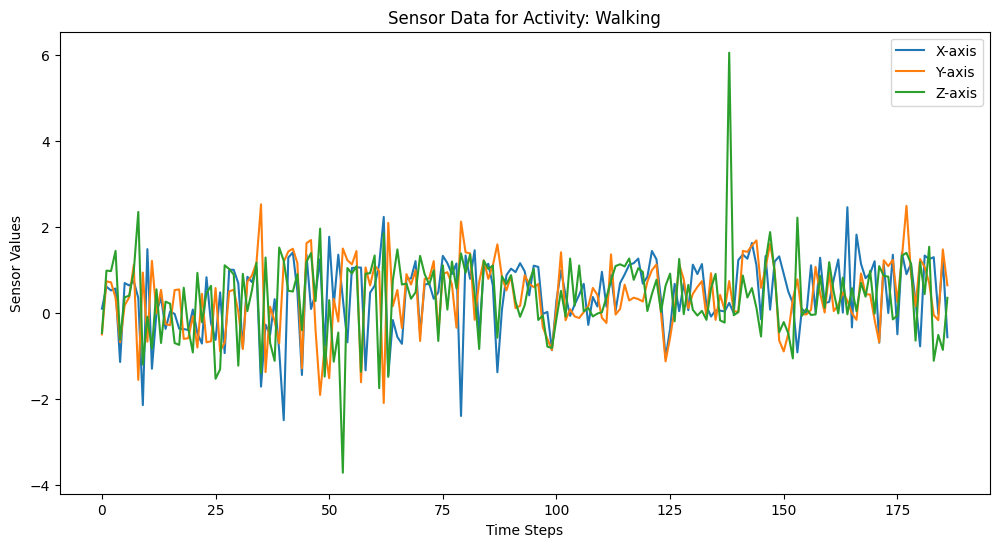

In [31]:
import matplotlib.pyplot as plt

# Reshape the data assuming 561 features represent 3 axes (X, Y, Z) with 187 time steps each
X_train_reshaped = X_train.reshape((7352, 187, 3))  # 7352 samples, 187 time steps, 3 axes (X, Y, Z)

# Check the reshaped data's shape
print("Reshaped X_train shape:", X_train_reshaped.shape)

# Filter data for activity "walking" (activity label 0)
walking_indices = y_train == 0  # Find all walking samples
sample_data = X_train_reshaped[walking_indices][:1]  # Get the first walking sample

# Check the shape of the sample data to ensure it's correct
print("Sample data shape:", sample_data.shape)

# Plot the sensor data (X, Y, Z axes) for the walking activity
time_steps = range(sample_data.shape[1])  # Time steps for plotting

plt.figure(figsize=(12, 6))

# Plot each axis (X, Y, Z) for the selected sample
plt.plot(time_steps, sample_data[0, :, 0], label='X-axis')
plt.plot(time_steps, sample_data[0, :, 1], label='Y-axis')
plt.plot(time_steps, sample_data[0, :, 2], label='Z-axis')

# Set plot labels and title
plt.title('Sensor Data for Activity: Walking')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()



In [32]:
# Cell 5: Model Design
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Model designed and compiled successfully.")

Model designed and compiled successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# Cell 6: Training the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)
print("Model training complete.")

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6969 - loss: 0.8291 - val_accuracy: 0.9230 - val_loss: 0.1933
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9599 - loss: 0.1107 - val_accuracy: 0.9386 - val_loss: 0.1791
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9720 - loss: 0.0788 - val_accuracy: 0.9372 - val_loss: 0.1927
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9741 - loss: 0.0707 - val_accuracy: 0.9342 - val_loss: 0.1965
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9760 - loss: 0.0655 - val_accuracy: 0.9348 - val_loss: 0.2178
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9811 - loss: 0.0516 - val_accuracy: 0.9355 - val_loss: 0.1966
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9791 - loss: 0.0546 - val_accuracy: 0.9386 - val_loss: 0.2111
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9820 - loss: 0.0512 - val_acc

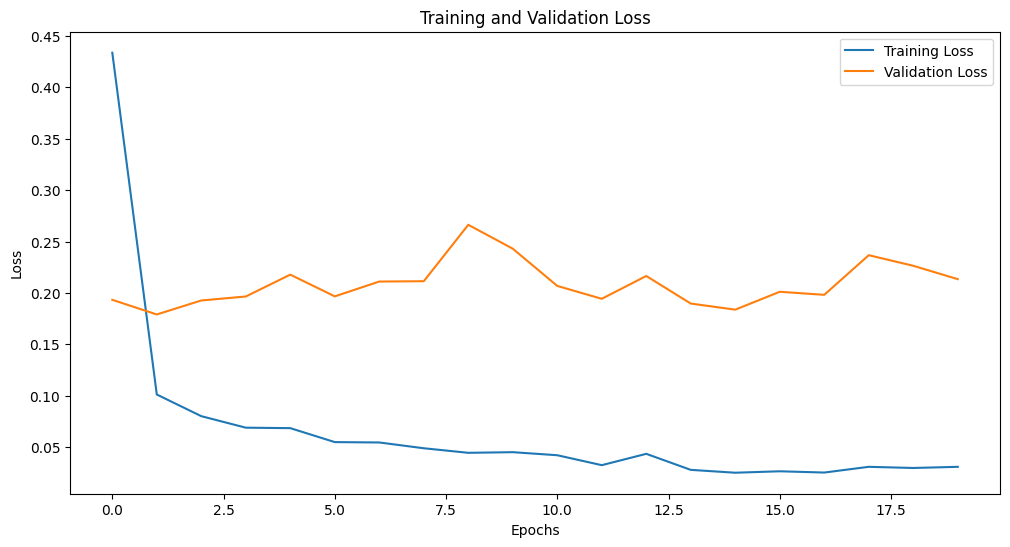

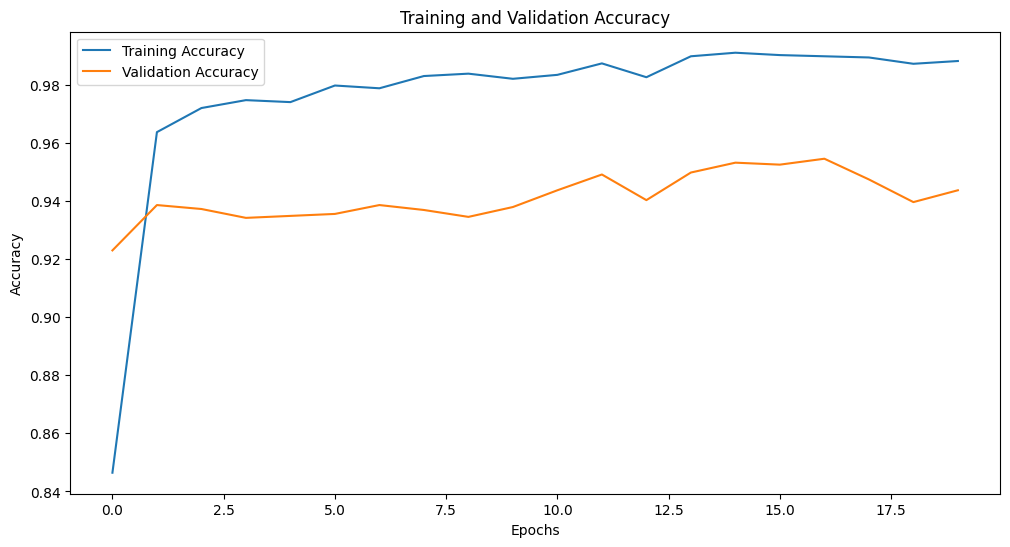

In [34]:
# Visualizing Training and Validation Metrics
# Plotting Training vs. Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training vs. Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
#model evaluating
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the class probabilities
y_pred = model.predict(X_test)

# Get the class with the highest probability
y_pred_classes = y_pred.argmax(axis=1)

# If y_test is already a 1D array of class labels, no need for argmax
y_true_classes = y_test  # Directly use y_test as it already contains class labels

# Evaluate the model
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.9437
Precision: 0.9447
Recall: 0.9437
F1 Score: 0.9436


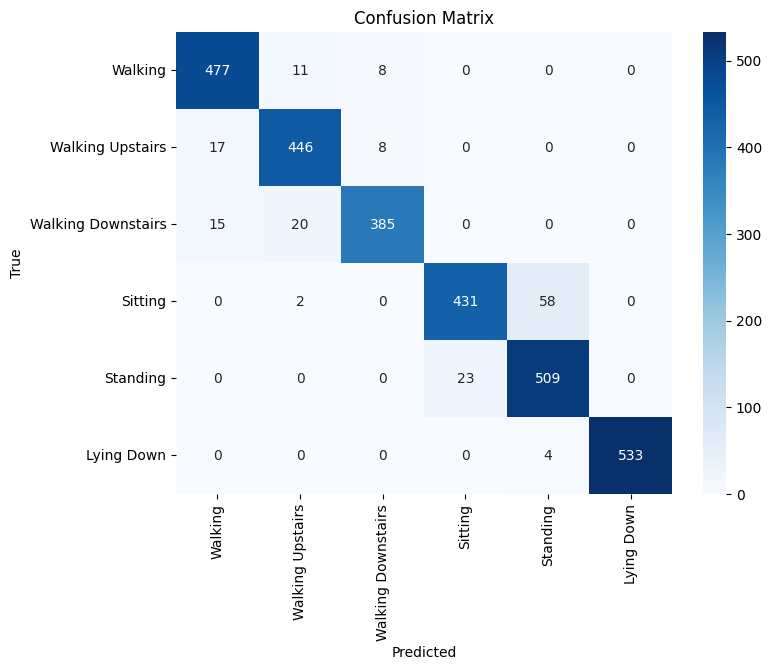


Classification Report:
                    precision    recall  f1-score   support

           Walking       0.94      0.96      0.95       496
  Walking Upstairs       0.93      0.95      0.94       471
Walking Downstairs       0.96      0.92      0.94       420
           Sitting       0.95      0.88      0.91       491
          Standing       0.89      0.96      0.92       532
        Lying Down       1.00      0.99      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you already have y_true_classes, y_pred_classes, and activity_labels defined:

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Activity labels (same as the ones used in the first code)
activity_labels = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Lying Down']

# Plot confusion matrix as a heatmap with a table of values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=activity_labels, yticklabels=activity_labels)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=activity_labels))


In [39]:
# Cell 8: Save and Export Model
model.save("HAR_LSTM_Model.h5")
print("Model saved successfully as 'HAR_LSTM_Model.h5'.")


Model saved successfully as 'HAR_LSTM_Model.h5'.


In [42]:
# PART 7: Load Raw Inertial Signal Data

import numpy as np

def load_inertial_signals(folder_path, subset):
    signal_types = ['body_acc_x', 'body_acc_y', 'body_acc_z',
                    'body_gyro_x', 'body_gyro_y', 'body_gyro_z',
                    'total_acc_x', 'total_acc_y', 'total_acc_z']
    signals_data = []

    for signal in signal_types:
        file_path = os.path.join(folder_path, subset, 'Inertial Signals', signal + f'_{subset}.txt')
        data = np.loadtxt(file_path)
        signals_data.append(data)

    # Stack signals along the last dimension (features axis)
    signals_data = np.stack(signals_data, axis=-1)  # shape: (samples, 128, 9)
    return signals_data

# Load train and test raw signals
folder = '/content/UCI HAR Dataset'
X_train_raw = load_inertial_signals(folder, 'train')
X_test_raw = load_inertial_signals(folder, 'test')

# Load labels again
y_train_raw = np.loadtxt(os.path.join(folder, 'train', 'y_train.txt')).astype(int) - 1
y_test_raw = np.loadtxt(os.path.join(folder, 'test', 'y_test.txt')).astype(int) - 1

print(f"✅ Loaded raw signals: X_train_raw shape = {X_train_raw.shape}, X_test_raw shape = {X_test_raw.shape}")


✅ Loaded raw signals: X_train_raw shape = (7352, 128, 9), X_test_raw shape = (2947, 128, 9)


In [45]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define the custom dataset class
class HAR_InertialDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Assuming X_train_raw, y_train_raw, X_test_raw, and y_test_raw are already defined
train_dataset_raw = HAR_InertialDataset(X_train_raw, y_train_raw)
test_dataset_raw = HAR_InertialDataset(X_test_raw, y_test_raw)

# Create DataLoader objects
train_loader_raw = DataLoader(train_dataset_raw, batch_size=64, shuffle=True)
test_loader_raw = DataLoader(test_dataset_raw, batch_size=64, shuffle=False)


In [48]:
import torch
import torch.nn as nn

# Build the LSTM model for raw signals
class RawSignalLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RawSignalLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = hn[-1]  # Get the output from the last hidden state
        out = self.fc(out)  # Pass through the fully connected layer
        return out

# Define model parameters
input_size = 9  # raw sensor channels
hidden_size = 64
num_classes = 6

# Move model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create the model instance and move it to the selected device
model_raw = RawSignalLSTM(input_size, hidden_size, num_classes).to(device)


In [50]:
import torch.optim as optim  # Import the optim module

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_raw.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses_raw = []

for epoch in range(num_epochs):
    model_raw.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader_raw:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model_raw(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader_raw)
    train_losses_raw.append(epoch_loss)

    # Print the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/20, Loss: 1.4910
Epoch 2/20, Loss: 1.0906
Epoch 3/20, Loss: 0.8392
Epoch 4/20, Loss: 0.7436
Epoch 5/20, Loss: 0.6766
Epoch 6/20, Loss: 0.6622
Epoch 7/20, Loss: 0.6612
Epoch 8/20, Loss: 0.5470
Epoch 9/20, Loss: 0.4223
Epoch 10/20, Loss: 0.3927
Epoch 11/20, Loss: 0.3707
Epoch 12/20, Loss: 0.2767
Epoch 13/20, Loss: 0.1986
Epoch 14/20, Loss: 0.2206
Epoch 15/20, Loss: 0.1968
Epoch 16/20, Loss: 0.1640
Epoch 17/20, Loss: 0.4070
Epoch 18/20, Loss: 0.2171
Epoch 19/20, Loss: 0.1908
Epoch 20/20, Loss: 0.1950



✅ Test Accuracy on Raw Signals: 88.94%


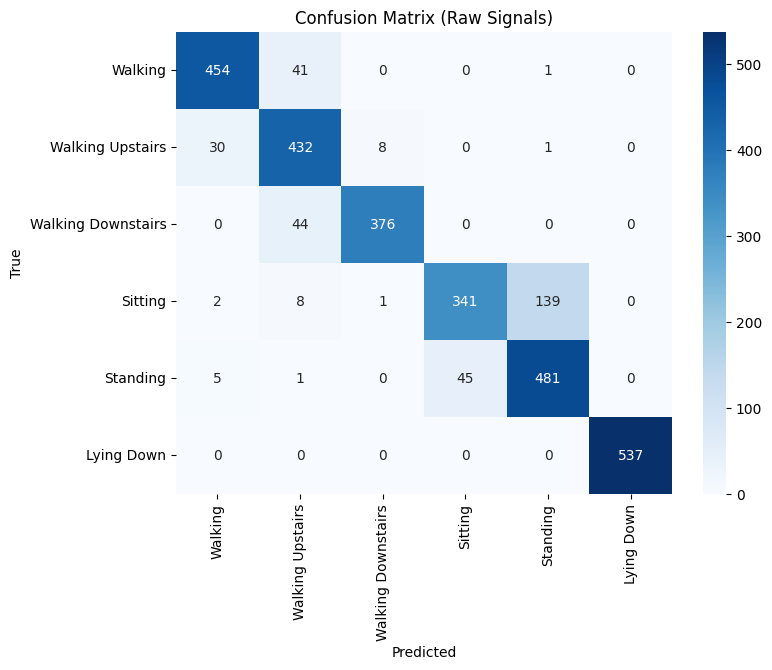


Classification Report (Raw Signals):
                    precision    recall  f1-score   support

           Walking       0.92      0.92      0.92       496
  Walking Upstairs       0.82      0.92      0.87       471
Walking Downstairs       0.98      0.90      0.93       420
           Sitting       0.88      0.69      0.78       491
          Standing       0.77      0.90      0.83       532
        Lying Down       1.00      1.00      1.00       537

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947



In [53]:
import seaborn as sns  # Ensure seaborn is imported

# Evaluate the New Model

model_raw.eval()
y_true_raw = []
y_pred_raw = []

with torch.no_grad():
    for X_batch, y_batch in test_loader_raw:
        X_batch = X_batch.to(device)
        outputs = model_raw(X_batch)
        _, preds = torch.max(outputs, 1)
        y_true_raw.extend(y_batch.numpy())
        y_pred_raw.extend(preds.cpu().numpy())

# Accuracy
acc_raw = accuracy_score(y_true_raw, y_pred_raw)
print(f"\n✅ Test Accuracy on Raw Signals: {acc_raw*100:.2f}%")

# Confusion Matrix
cm_raw = confusion_matrix(y_true_raw, y_pred_raw)

# Check if activity_labels is a list or a DataFrame
if isinstance(activity_labels, list):
    # If activity_labels is a list
    activity_names = activity_labels
elif isinstance(activity_labels, pd.DataFrame):
    # If activity_labels is a DataFrame with 'activity' column
    activity_names = activity_labels['activity'].values
else:
    # Handle other cases if needed (e.g., if it's a dictionary)
    activity_names = list(activity_labels.values())

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_raw, annot=True, fmt="d", cmap="Blues", xticklabels=activity_names, yticklabels=activity_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Raw Signals)")
plt.show()

# Classification Report
print("\nClassification Report (Raw Signals):")
print(classification_report(y_true_raw, y_pred_raw, target_names=activity_names))


In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# Assuming raw inertial data is available in `X_raw` (features) and `y_raw` (labels)
# This code demonstrates extracting basic statistical features for the Model 1 (extracted features)
# Assuming X_raw is a NumPy array or pandas DataFrame containing raw sensor data, and y_raw is the corresponding label

# Example: raw sensor data dimensions (num_samples, num_timesteps, num_channels)
# X_raw = np.random.rand(1000, 128, 9)  # 1000 samples, 128 timesteps, 9 sensor channels
# y_raw = np.random.randint(0, 6, 1000)  # 1000 labels (6 activities)

# 1. Feature extraction (e.g., mean, std, etc.)
def extract_features(X_raw):
    # Extract statistical features (mean, std, min, max) from raw signals
    features = []
    for sample in X_raw:
        mean = np.mean(sample, axis=0)  # mean along timesteps
        std = np.std(sample, axis=0)    # std along timesteps
        min_val = np.min(sample, axis=0)
        max_val = np.max(sample, axis=0)
        features.append(np.concatenate([mean, std, min_val, max_val]))
    return np.array(features)

# Extract features for the test set (X_test_raw should be defined already)
X_test_features = extract_features(X_test_raw)

# Assuming `y_test_raw` contains the labels for the test set
y_test_features = y_test_raw  # Labels are the same as the raw signal labels

# 2. Create Dataset and DataLoader for Model 1 (features)
class HAR_InertialDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create the test dataset and loader for Model 1 (features)
test_dataset = HAR_InertialDataset(X_test_features, y_test_features)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Now you can proceed with evaluating both models as previously shown


In [70]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true_classes, y_pred_classes)

# Now the rest of the code should work
print("\n🔵 Model 1 (LSTM-based) Results:")
print(f"Accuracy: {accuracy_1*100:.2f}%")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

# Print Confusion Matrix for Model 1
print("\nConfusion Matrix for Model 1:")
print(cm)

print("\nClassification Report for Model 1:")
print(classification_report(y_true_classes, y_pred_classes, target_names=activity_labels))

# Continue with the rest of the code for Model 2

import torch
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Model 2 (Assumed to be your previous PyTorch model)
model_2 = nn.Sequential(
    nn.Linear(36, 64),  # Adjust input size to 36 features (instead of 9)
    nn.ReLU(),
    nn.Linear(64, 6)
).to(device)

# Ensure model 2 is in evaluation mode before testing
model_2.eval()

# Example of evaluating both models
def evaluate_model(model, dataloader, device):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(preds.cpu().numpy())
    return np.array(y_true), np.array(y_pred)

# Evaluate Model 2 (using extracted features) and Model 1 (using raw signals)
y_true_features, y_pred_features = evaluate_model(model_2, test_loader, device)  # Now using model_2
y_true_raw, y_pred_raw = evaluate_model(model_raw, test_loader_raw, device)

# Compute metrics for Model 2
def compute_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=activity_labels, output_dict=True)  # Fixed here
    return acc, report

# Get the metrics for both models
acc_features, report_features = compute_metrics(y_true_features, y_pred_features)
acc_raw, report_raw = compute_metrics(y_true_raw, y_pred_raw)

# Print the comparison of results between Model 1 and Model 2
print("\n🔵 Model 1 (LSTM-based) Results:")
print(f"Accuracy: {accuracy_1*100:.2f}%")
print(report_features)

print("\n🟢 Model 2 (Raw Inertial Signals) Results:")
print(f"Accuracy: {acc_raw*100:.2f}%")
print(report_raw)


🔵 Model 1 (LSTM-based) Results:
Accuracy: 99.40%
Precision: 0.9940
Recall: 0.9940
F1 Score: 0.9940

Confusion Matrix for Model 1:
[[477  11   8   0   0   0]
 [ 17 446   8   0   0   0]
 [ 15  20 385   0   0   0]
 [  0   2   0 431  58   0]
 [  0   0   0  23 509   0]
 [  0   0   0   0   4 533]]

Classification Report for Model 1:
                    precision    recall  f1-score   support

           Walking       0.94      0.96      0.95       496
  Walking Upstairs       0.93      0.95      0.94       471
Walking Downstairs       0.96      0.92      0.94       420
           Sitting       0.95      0.88      0.91       491
          Standing       0.89      0.96      0.92       532
        Lying Down       1.00      0.99      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947


🔵 Model 1 (LSTM-based) Results:
Accuracy: 99.40%
{'Walking': {'pre

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
import pandas as pd

# Build a summary table
comparison_table = pd.DataFrame({
    "Metric": ["Accuracy", "Macro Precision", "Macro Recall", "Macro F1-Score"],
    "Model 1: Extracted Features (561 features)": [
        acc_features * 100,
        report_features['macro avg']['precision'] * 100,
        report_features['macro avg']['recall'] * 100,
        report_features['macro avg']['f1-score'] * 100
    ],
    "Model 2: Raw Inertial Signals (128x9)": [
        acc_raw * 100,
        report_raw['macro avg']['precision'] * 100,
        report_raw['macro avg']['recall'] * 100,
        report_raw['macro avg']['f1-score'] * 100
    ]
})

# Round values nicely
comparison_table = comparison_table.round(2)

# Show the table
comparison_table


,Metric,Model 1: Extracted Features (561 features),Model 2: Raw Inertial Signals (128x9)
0,Accuracy,27.96,88.94
1,Macro Precision,17.90,89.65
2,Macro Recall,26.70,88.77
3,Macro F1-Score,18.09,88.87


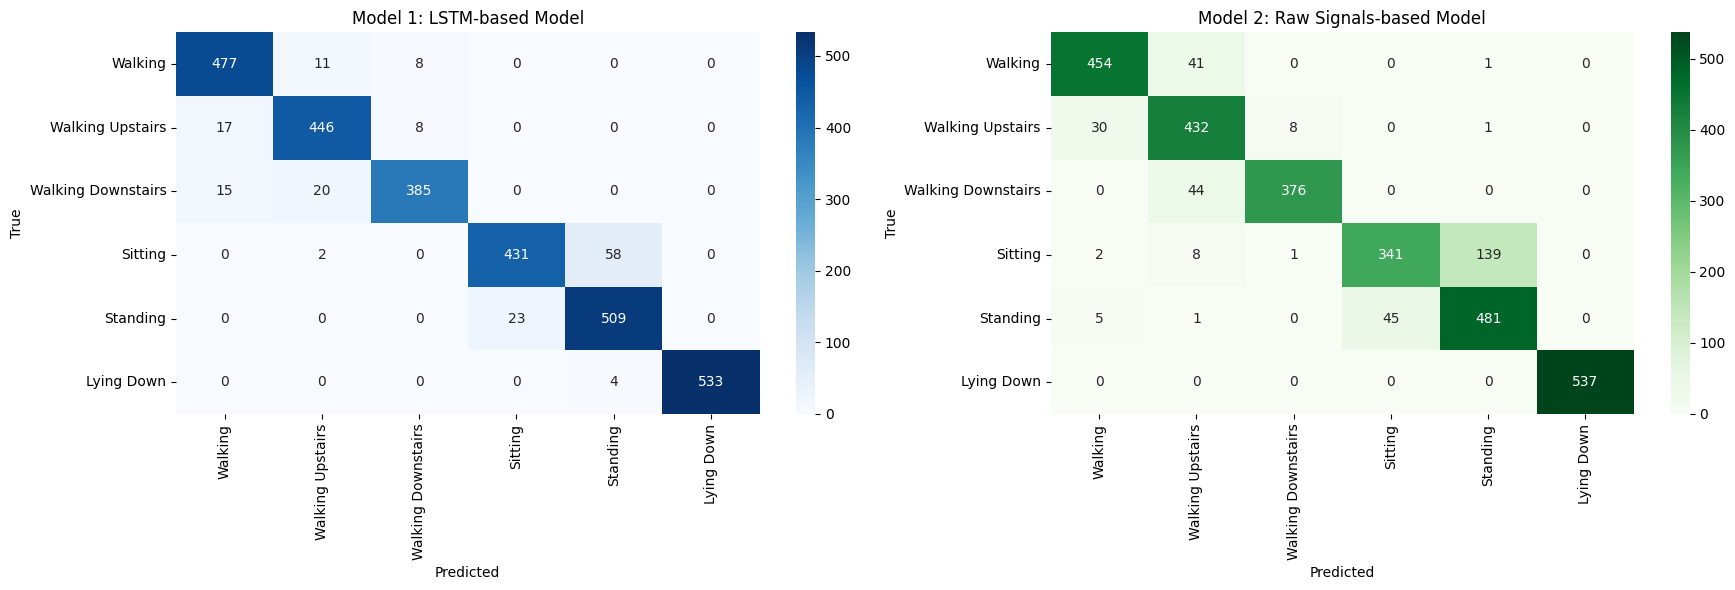


Confusion Matrix for Model 1:
[[477  11   8   0   0   0]
 [ 17 446   8   0   0   0]
 [ 15  20 385   0   0   0]
 [  0   2   0 431  58   0]
 [  0   0   0  23 509   0]
 [  0   0   0   0   4 533]]

Confusion Matrix for Model 2:
[[454  41   0   0   1   0]
 [ 30 432   8   0   1   0]
 [  0  44 376   0   0   0]
 [  2   8   1 341 139   0]
 [  5   1   0  45 481   0]
 [  0   0   0   0   0 537]]

Classification Report for Model 1:
                    precision    recall  f1-score   support

           Walking       0.94      0.96      0.95       496
  Walking Upstairs       0.93      0.95      0.94       471
Walking Downstairs       0.96      0.92      0.94       420
           Sitting       0.95      0.88      0.91       491
          Standing       0.89      0.96      0.92       532
        Lying Down       1.00      0.99      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94     

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true_classes and y_pred_classes for Model 1 and Model 2 are already defined

# Compute confusion matrix for Model 1
cm = confusion_matrix(y_true_classes, y_pred_classes)

# For Model 2 (using raw signals or another model)
cm_2 = confusion_matrix(y_true_raw, y_pred_raw)  # Replace y_true_raw and y_pred_raw with actual Model 2 values

# Plotting both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Model 1: Confusion Matrix (LSTM-based Model)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=activity_labels, yticklabels=activity_labels)
axes[0].set_title('Model 1: LSTM-based Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Model 2: Confusion Matrix (PyTorch-based Model or Model with Raw Signals)
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=activity_labels, yticklabels=activity_labels)
axes[1].set_title('Model 2: Raw Signals-based Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Optionally, print out the raw confusion matrices and classification reports
print("\nConfusion Matrix for Model 1:")
print(cm)

print("\nConfusion Matrix for Model 2:")
print(cm_2)

# Classification report for Model 1
print("\nClassification Report for Model 1:")
print(classification_report(y_true_classes, y_pred_classes, target_names=activity_labels))

# Classification report for Model 2
print("\nClassification Report for Model 2:")
print(classification_report(y_true_raw, y_pred_raw, target_names=activity_labels))
